# Simulation and Performance Evaluation - Homework 1

### University of Trento - A.Y. 2019 / 2020

---
Lotito Quintino Francesco - 215032

Zanella Davide - 211463

---




**Important:** we expect the datasets to be in the same directory of this notebook.

## Exercise 1

### Problem statement

Load the iid data samples from the CSV file `data_ex1.csv` and provide:
1. the median and a 95% confidence interval for the median
2. the mean, a 95% and a 99% confidence interval for the mean

Explain which formulas you used and why.

### Solution

Firstly, we need to load the data from `data_ex1.csv`.


In [7]:
def load():
    file = open("data_ex1.csv", "r")
    data = [float(x) for x in file.readlines()]
    return data

In [8]:
data = load()
print("Number of samples loaded: ", len(data))

Number of samples loaded:  1000


In [9]:
def compute_median(values):
    values = list(sorted(values))
    n = len(values)
    if(n % 2 != 0): # odd
        idx = int((n+1) / 2)
        return values[idx]
    else: # even
        idx = int(n/2)
        return (values[idx] + values[idx + 1]) / 2

In [10]:
median = compute_median(data)

In [11]:
print("Median: ", median)

Median:  0.4034808006202


In [12]:
from math import floor, ceil, sqrt

In [13]:
def calc_j_k(values):  # calculate j, k for confidence level 95%
    n = len(values)
    j_idx = floor(0.5 * n - 0.98 * sqrt(n))
    k_idx = ceil(0.5 * n + 1 + 0.98 * sqrt(n))
    return j_idx, k_idx

In [14]:
j, k = calc_j_k(data)
print("j:", j, " - k:", k)

j: 469  - k: 532


In [15]:
j_val, k_val = data[j], data[k]
print("95% confidence interval for the median:")
print("[", j_val, ";", k_val, "]")

95% confidence interval for the median:
[ 0.59106344372459 ; 0.444082621512764 ]


In [16]:
def compute_mean(values):
    tot = 0
    for i in values:
        tot += i
    return tot / len(values)

In [17]:
mean = compute_mean(data)
print("Mean:", mean)

Mean: 0.41020458058272374


In [18]:
def compute_std_dev(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += (i - mean) ** 2
    return sqrt(tot / len(values))

In [19]:
std_dev = compute_std_dev(data)
print("Standard deviation:", std_dev)

Standard deviation: 0.18280369403703184


In [20]:
def mean_interval(values, eta):
    mean = compute_mean(data)
    std_dev = compute_std_dev(data)
    incr = eta * std_dev / sqrt(len(values))
    return mean - incr, mean + incr

In [21]:
start, end = mean_interval(data, 1.96)
print("Confidence interval for mean with gamma 95%: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 95%: [0.39887429024087234, 0.42153487092457514]


In [22]:
start, end = mean_interval(data, 2.58)
print("Confidence interval for mean with gamma 99%: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 99%: [0.3952902188062051, 0.4251189423592424]


## Exercise 2

### Problem statement

Load the data from the CSV filedata_ex2.csv. This should be a matrix with 6001 rows and 200 columns. All entries are iid.

1. Find a 95% confidence interval for the data of the first row.
2. Find the mean of all the remaining 6000 rows, and check how many of these means fall inside the confidenceinterval you computed for the first row. Is this what you expected? Explain.

### Solution

In [23]:
def load():
    file = open("data_ex2.csv", "r")
    values = [[float(x) for x in line.split(",")] for line in file.readlines()]
    return values

In [24]:
values = load()

print("Number of values:", len(values))

Number of values: 6001


In [25]:
first_row = values[0]
print("Number of elements in the first row:", len(first_row))

Number of elements in the first row: 200


In [26]:
s = compute_std_dev(first_row)
print("Standard deviation of the first row:", s)

Standard deviation of the first row: 1.709792005976982


In [27]:
start, end = mean_interval(first_row, 1.96)
print("Confidence interval for mean with gamma 95% of the first row: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 95% of the first row: [0.3848692811735347, 0.4355398799919128]


In [30]:
count = 0
for row in values[1:]:
    m = compute_mean(row)
    if m <= end and m >= start:
        count += 1

print("Number of rows with mean falling in the confidence interval:", count)

Number of rows with mean falling in the confidence interval: 0


## Exercise 3

### Problem statement

Load the data from the CSV filedata_ex3.csv.

1. Compute the CoV for the data, Jain’s fairness index and the Lorenz curve gap
2. Plot the Lorenz curve; discuss the correspondence with the values of the previous point, and the differencebetween the values of the Lorenz curve gap and of Jain’s fairness index.
3. Implement the bootstrap algorithm seen in class and use it to compute 95% and 99% confidence intervals for:    
    (a) the Lorenz curve gap;    
    (b) Jain’s fairness index;    
    (c) the mean of the data;    
    (d) the standard deviation of the data,
    
4. Compare the obtained confidence interval for the mean with the one obtained via the asymptotic formulas. Discuss.


### Solution

In [31]:
def load():
    file = open("data_ex3.csv", "r")
    values = [float(x) for x in file.readlines()]
    return values

In [32]:
values = load()
print("Number of values:", len(values))

Number of values: 500


In [33]:
m = compute_mean(values)
print("Mean:", m)

Mean: 4.084097581606038


In [35]:
s = compute_std_dev(values)
print("Standard deviation:", s)

Standard deviation: 4.086005532648478


In [44]:
def compute_cov(values):
    m = compute_mean(values)
    s = compute_std_dev(values)

    return s / m

In [45]:
cov = compute_cov(values)
print("CoV:", cov)

CoV: 1.000467165880422


In [46]:
def compute_jfi(values):
    cov = compute_cov(values)
    return 1 / (1 + cov ** 2)

In [48]:
jfi = compute_jfi(values)
print("Jain’s fairness index:", jfi)

Jain’s fairness index: 0.499766471620773


In [49]:
def compute_lorenz_cg(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += abs(i - mean)

    mad = tot / len(values)
    return mad / (2 * mean)

In [50]:
lorenz_gap = compute_lorenz_cg(values)
print("Lorenz Curve Gap:", lorenz_gap)

Lorenz Curve Gap: 0.36230444707595716


In [51]:
def lorenz_curve(values):
    x = []
    y = []

    mean = compute_mean(values)
    values = sorted(values)
    n = len(values)
    tot = 0
    for i in range(len(values)):
        x.append((i + 1) / n)
        tot += values[i]
        y.append(tot / (n * mean))

    return x, y

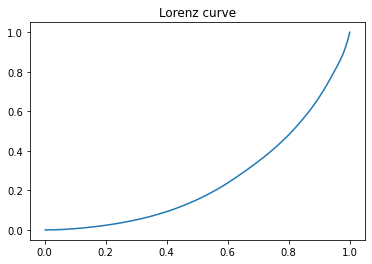

In [54]:
import matplotlib.pyplot as plt 

x, y = lorenz_curve(values)
plt.plot(x, y) 

plt.title('Lorenz curve') 

plt.show() 

In [55]:
r0 = 25

In [57]:
import random as rnd

def bootstrap(values, r0, gamma, t_func):
    R = ceil(2 * r0 / (1 - gamma)) - 1
    n = len(values)
    T = []
    for r in range(R):
        samples = []
        for _ in range(n):
            idx = rnd.randrange(0, n)
            samples.append(values[idx])
        stat = t_func(samples)
        T.append(stat)
    T = sorted(T)
    return T[r0], T[R + 1 - r0]

In [61]:
fn = lambda a: compute_lorenz_cg(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Lorenz curve gap 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Lorenz curve gap 99%: [{}, {}]".format(start, end))

Bootstrap of Lorenz curve gap 95%: [0.3398415743313987, 0.38362008322442515]
Bootstrap of Lorenz curve gap 99%: [0.3341511017784107, 0.38940990390225844]


In [64]:
fn = lambda a: compute_jfi(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Jain’s fairness index 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Jain’s fairness index 99%: [{}, {}]".format(start, end))

Bootstrap of Jain’s fairness index 95%: [0.4585932992447762, 0.545669921742223]
Bootstrap of Jain’s fairness index 99%: [0.4452985374990083, 0.5600748565287262]


In [65]:
fn = lambda a: compute_mean(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Mean 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Mean 99%: [{}, {}]".format(start, end))

Bootstrap of Mean 95%: [3.7541554672052913, 4.464602336933829]
Bootstrap of Mean 99%: [3.6437915215491032, 4.5706054961870475]


In [66]:
fn = lambda a: compute_std_dev(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Standard deviation 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Standard deviation 99%: [{}, {}]".format(start, end))

Bootstrap of Standard deviation 95%: [3.578425579786624, 4.630336526224143]
Bootstrap of Standard deviation 99%: [3.416402560590735, 4.820970136474851]


In [68]:
start, end = mean_interval(values, 1.96)
print("Confidence interval for mean with gamma 95%: [{}, {}]".format(start, end))

start, end = mean_interval(values, 2.58)
print("Confidence interval for mean with gamma 99%: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 95%: [0.3941811303156526, 0.4262280308497949]
Confidence interval for mean with gamma 99%: [0.38911248788423214, 0.43129667328121535]


## Exercise 4

### Problem statement

Load the data from the CSV filedata_ex4.csv.

1. Give a 95% and a 99% confidence interval for the mean using the bootstrap method.
2. Compare the results against the value obtained from the asymptotic formulas. Explain.
3. Transform the data using a log transformation and give the a confidence interval for the transformedmean.

### Solution

In [69]:
def load():
    file = open("data_ex4.csv", "r")
    values = [float(x) for x in file.readlines()]
    return values

In [70]:
values = load()
print("Number of values:", len(values))

Number of values: 500


In [71]:
m = compute_mean(values)
print("Mean:", m)

Mean: 4193.326330220401


In [73]:
s = compute_std_dev(values)
print("Standard deviation:", s)

Standard deviation: 84564.22566364624


In [74]:
r0 = 25

In [75]:
fn = lambda a: compute_mean(a)

start, end = bootstrap(values, r0, 0.95, fn)
print("Bootstrap of Mean 95%: [{}, {}]".format(start, end))

start, end = bootstrap(values, r0, 0.99, fn)
print("Bootstrap of Mean 99%: [{}, {}]".format(start, end))

Bootstrap of Mean 95%: [115.70144681055385, 15227.073757971044]
Bootstrap of Mean 99%: [60.50907124041843, 16086.886753119088]


In [77]:
start, end = mean_interval(values, 1.96)
print("Confidence interval for mean with gamma 95%: [{}, {}]".format(start, end))

start, end = mean_interval(values, 2.58)
print("Confidence interval for mean with gamma 99%: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 95%: [0.3941811303156526, 0.4262280308497949]
Confidence interval for mean with gamma 99%: [0.38911248788423214, 0.43129667328121535]


In [83]:
from math import log, exp

log_values = [log(x) for x in values]

log_mean = compute_mean(log_values)
log_std = compute_std_dev(log_values)

In [86]:
trans_mean = exp(log_mean)
print("Transformation mean:", trans_mean)

Transformation mean: 2.272258276241015


In [87]:
trans_std = exp(log_std)
print("Transformation standard deviation:", trans_std)

Transformation standard deviation: 13.497052033074423


In [89]:
start, end = mean_interval(log_values, 1.96)
print("Confidence interval for transformation mean with gamma 95%: [{}, {}]".format(start, end))

start, end = mean_interval(log_values, 2.58)
print("Confidence interval for transformation mean with gamma 99%: [{}, {}]".format(start, end))

Confidence interval for transformation mean with gamma 95%: [0.3941811303156526, 0.4262280308497949]
Confidence interval for transformation mean with gamma 99%: [0.38911248788423214, 0.43129667328121535]


## Exercise 5

### Problem statement

Load the data from the CSV filedata_ex5.csv. Note that this data represents successes (ones) and insuccesses(zeros) of some experiment.

1. Find the probability of success and confidence intervals for it at both a 95% and at a 99% level.
2. Consider now only the first 15 data points.  Find a confidence interval for the probability of success.Explain.

### Solution

In [91]:
def load():
    file = open("data_ex5.csv", "r")
    values = [int(x) for x in file.readlines()[0].split(',')]
    return values

In [92]:
values = load()
print("Number of values:", len(values))

Number of values: 1000


In [93]:
m = compute_mean(values)
print("Probability of success (mean):", m)

Probability of success (mean): 0.125


In [94]:
s = compute_std_dev(values)
print("Standard deviation:", s)

Standard deviation: 0.33071891388307384


In [95]:
start, end = mean_interval(values, 1.96)
print("Confidence interval for mean with gamma 95%: [{}, {}]".format(start, end))

start, end = mean_interval(values, 2.58)
print("Confidence interval for mean with gamma 99%: [{}, {}]".format(start, end))

Confidence interval for mean with gamma 95%: [0.39887429024087234, 0.42153487092457514]
Confidence interval for mean with gamma 99%: [0.3952902188062051, 0.4251189423592424]


In [97]:
first_15_rows = values[:15]

In [ ]:
m_r = compute_mean(first_rows)
print("Probability of success of the first 15 rows (mean):", m_r)